## Replace this with your name and Section

DS 256 Data Science Programming, Fall 2024

Prof Eatai Roth

## Problem Set 4
Due 11/4/2024 by 5p

### Problem 1
Write a function ```greaterThan(A, lower_lim)``` that takes as an argument a numpy array A and a number lower_lim and returns an array with every entry less than or equal to lower_lim replaced by zero. That is to say, only the numbers strictly greater than lower_lim remain, the rest are 0.

In [1]:
'''your code here'''
import numpy as np

def greaterThan(A, lower_lim):
    # Create a new array where values less than or equal to lower_lim are replaced by zero
    result = np.where(A > lower_lim, A, 0)
    return result



In [2]:
A = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9])
B = np.array([[-1, 1], [2, -2], [0, 3]])
C = np.array([[101.1, 100, 99.9], [99.8, 100.1, 98.9], [103.2, 99, 98]])

assert np.all(greaterThan(A, 5) == np.array([0, 0, 0, 0, 0, 6, 7, 8, 9]))
assert np.all(greaterThan(B, 0) == np.array([[0, 1], [2, 0], [0, 3]]))
assert np.all(greaterThan(C, 100) == np.array([[101.1, 0, 0], [0, 100.1, 0], [103.2, 0, 0]]))

print("You passed all the tests!")

You passed all the tests!


### Problem 2
Write a function ```subtractMean(A)``` that takes as an input the numpy array and returns the array with the mean of all the values subtracted from every element.

In [3]:
'''your code here'''
import numpy as np

def subtractMean(A):
    # Calculate the mean of the array
    mean_value = np.mean(A)
    # Subtract the mean from each element in the array
    result = A - mean_value
    return result


If the tests below aren't passing, check the values of A, B, and C. These should be the same as in the test for Problem 1. If the values in these arrays have changed, why might that be?

In [4]:
assert np.isclose(subtractMean(A), np.array([-4., -3., -2., -1.,  0.,  1.,  2.,  3.,  4.])).all()
assert np.isclose(subtractMean(B), np.array([[-1.5,  0.5],[ 1.5, -2.5],[-0.5,  2.5]])).all()
assert np.isclose(subtractMean(C), np.array([[ 1.1,  0. , -0.1],[-0.2,  0.1, -1.1],[ 3.2, -1. , -2. ]])).all()

print("You passed all the tests!")


You passed all the tests!


### Problem 3

Write a function ```arrayEdges``` that takes as an input an array and returns a 1-D array of all the elements on the edges of the array starting at the upper left corner and working around clockwise. Do not repeat that first element. If the original array is not 2-D, print('Error') and return -1.

*Hint*: Get the shape of the array as height and width, calculate the perimeter (remember not to double count the corners), and make an array of zeros the size of the perimeter. Then fill that array.

*Hint 2*: The length of the shape of a 2-D array is 2.

*Hint 3*: ```dA = A.dtype``` is the data type of A. ```np.zeros().astype(dA)``` creates an array of that type (if A has strings, this will make an array of '0').

In [5]:
'''your code here'''
import numpy as np

def arrayEdges(arr):
    # Check if the input is a 2-D array
    if len(arr.shape) != 2:
        print("Error")
        return -1

    # Get the height and width of the array
    height, width = arr.shape
    # Calculate the perimeter size
    perimeter_size = 2 * (height + width - 2)
    
    # Create an output array of zeros with the same data type as the input array
    edge_elements = np.zeros(perimeter_size, dtype=arr.dtype)
    
    # Fill the edge array
    index = 0
    
    # Top edge (left to right)
    for i in range(width):
        edge_elements[index] = arr[0, i]
        index += 1
    
    # Right edge (top to bottom, excluding the top-right corner)
    for i in range(1, height):
        edge_elements[index] = arr[i, width - 1]
        index += 1
    
    # Bottom edge (right to left, excluding the bottom-right corner)
    for i in range(width - 2, -1, -1):
        edge_elements[index] = arr[height - 1, i]
        index += 1
    
    # Left edge (bottom to top, excluding the bottom-left and top-left corners)
    for i in range(height - 2, 0, -1):
        edge_elements[index] = arr[i, 0]
        index += 1
    
    return edge_elements


In [6]:
'''Test your code'''

X = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
Y = np.array([['you', 'got', 'this'],['!','correct','problem']])
Z = np.array(['but','this','wont', 'work'])

assert np.array(arrayEdges(X) == np.array([1, 2, 3, 6, 9, 8, 7, 4])).all()
assert np.array(arrayEdges(Y) == np.array(['you', 'got', 'this', 'problem', 'correct', '!'])).all()
assert arrayEdges(Z) == -1

print("You passed all the tests! (disregard that it says Error above...it's supposed to do that)")


Error
You passed all the tests! (disregard that it says Error above...it's supposed to do that)


## Palmer's Penguins

Below I've imported the Palmer's Penguins dataset, courtesy of Alison Horst's github. Fill in the blanks in Problem 4. You should add code cells below to write code to find the answers.

In [7]:
import pandas as pd

pp_df = pd.read_csv('https://raw.githubusercontent.com/allisonhorst/palmerpenguins/main/inst/extdata/penguins.csv')
pp_df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


In [8]:
# Get summary statistics for numerical columns
summary_statistics = pp_df.describe()
print(summary_statistics)


       bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g  \
count      342.000000     342.000000         342.000000   342.000000   
mean        43.921930      17.151170         200.915205  4201.754386   
std          5.459584       1.974793          14.061714   801.954536   
min         32.100000      13.100000         172.000000  2700.000000   
25%         39.225000      15.600000         190.000000  3550.000000   
50%         44.450000      17.300000         197.000000  4050.000000   
75%         48.500000      18.700000         213.000000  4750.000000   
max         59.600000      21.500000         231.000000  6300.000000   

              year  
count   344.000000  
mean   2008.029070  
std       0.818356  
min    2007.000000  
25%    2007.000000  
50%    2008.000000  
75%    2009.000000  
max    2009.000000  


In [9]:
# Count the number of occurrences of each species
species_count = pp_df['species'].value_counts()
print(species_count)


species
Adelie       152
Gentoo       124
Chinstrap     68
Name: count, dtype: int64


### Problem 4

 1. How many penguins were recorded? 

  - 344

 2. In terms of body mass, how big were the smallest and biggest penguins measured?

  - Smallest - 2700
  - Biggest 6300

 3. What species of penguins were recorded and how many of each?

 - Adelie - 152
 - Gentoo - 124
 - Chinstrap - 68

In [ ]:
'''your code here'''


### Problem 5

Plot a histogram of the body masses of penguins grouped by species. Make sure to include a title, axis labels, and a legend.

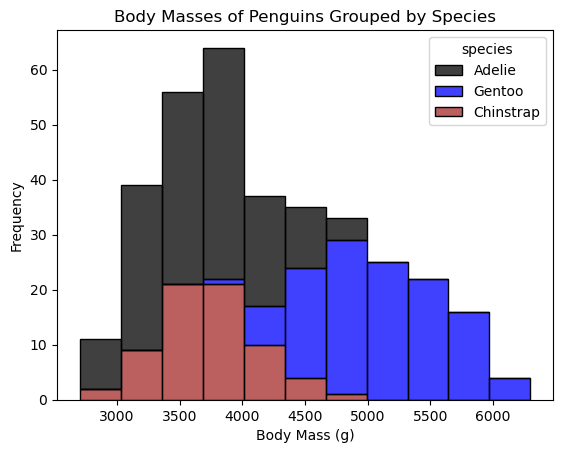

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
pp_df = pd.read_csv('https://raw.githubusercontent.com/allisonhorst/palmerpenguins/main/inst/extdata/penguins.csv')

# Set a color palette
palette = {"Adelie": "Black", "Chinstrap": "brown", "Gentoo": "blue"}

# Create the histogram
sns.histplot(data=pp_df, x='body_mass_g', hue='species', multiple='stack', palette=palette)

# Add titles and labels
plt.title('Body Masses of Penguins Grouped by Species')
plt.xlabel('Body Mass (g)')
plt.ylabel('Frequency')

# Show the plot
plt.show()


### Challenge Problem

Write a function ```interleaveArrays``` that takes as arguments two numpy arrays A and B and return a new numpy array with the rows of A and B interleaved, starting with A. If you run out of rows from one matrix or the other complete the array with the remaining rows of the longer array.

If the two arrays do not have the same number of columns, print('Error: Shapes of arrays are not compatible.') and return -1
If the two arrays contain different data types, print('Error: Types of arrays are not compatible.') and return -2

Example:

```
G = np.array([[1, 2, 3], [4, 5, 6]])
H = np.array([[10, 20, 30], [100, 200, 300], [1000, 2000, 3000]])

interleave(G,H)
```
returns
```
array([[1,2,3], [10,20,30], [4, 5, 6], [100, 200, 300], [1000, 2000, 3000]])
```

In [50]:
'''your code here'''
import numpy as np

def interleaveArrays(A, B):
    # Check if the shapes of the arrays are compatible
    if A.shape[1] != B.shape[1]:
        print('Error: Shapes of arrays are not compatible.')
        return -1
    
    # Check if the types of the arrays are compatible
    if A.dtype != B.dtype:
        print('Error: Types of arrays are not compatible.')
        return -2
    
    # Get the number of rows in both arrays
    len_A = A.shape[0]
    len_B = B.shape[0]
    
    # Calculate the total number of rows in the new array
    total_rows = len_A + len_B
    # Create an empty array to hold the interleaved result
    result = np.empty((total_rows, A.shape[1]), dtype=A.dtype)
    
    # Interleave the arrays
    index = 0
    for i in range(max(len_A, len_B)):
        if i < len_A:
            result[index] = A[i]
            index += 1
        if i < len_B:
            result[index] = B[i]
            index += 1
            
    return result

# Example usage
G = np.array([[1, 2, 3], [4, 5, 6]])
H = np.array([[10, 20, 30], [100, 200, 300], [1000, 2000, 3000]])

print(interleaveArrays(G, H))



[[   1    2    3]
 [  10   20   30]
 [   4    5    6]
 [ 100  200  300]
 [1000 2000 3000]]
